In [1]:
# General imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import zipfile
import os
import shutil
import datetime
import pickle
import tqdm
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D,LSTM,\
    Activation, Dropout, Dense, Embedding, GRU, Bidirectional,Conv2D, MaxPooling2D,\
    Input, Concatenate
from tensorflow.keras.models import Model
# import tensorflow_hub as hub # import error

# NLP
# from nltk.tokenize import word_tokenize as wt 
# from collections import Counter
# import gensim
# import textblob
# import spacy
# from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# Computer Vision
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [2]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'indigo',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }

**Establish data path**

In [ ]:
desktop = os.path.expanduser("~/Desktop")
print(desktop)
folder_path = "llmai/vision/gender_age/data"
data_path = os.path.join(desktop,folder_path)
print(data_path)
zip_folder_path = "utk_face.zip"
full_zipped_path = os.path.join(data_path,zip_folder_path)
print(full_zipped_path)

**Unzip files**

In [ ]:
# how to unzip a file using python
# https://stackoverflow.com/questions/3451111/unzipping-files-in-python
# how to unzip a specific folder in a zipped file using python
# https://stackoverflow.com/questions/13765486/how-to-unzip-specific-folder-from-a-zip-with-python

os.makedirs("data/gender_age_unzipped",exist_ok=True)
# full_unzipped_path = os.path.join(folder_path,"gender_age_unzipped") # not need for this here
with zipfile.ZipFile(full_zipped_path,'r') as unzipper:
    # Extract all the contents to specified direcctory
    for file in unzipper.namelist():
        print(f"File name: {file}")
        if file.startswith("UTKFace"):
            print(f"It exists!")
            unzipper.extract(file,'data/gender_age_unzipped')
        else:
            print(f"Does not exist")

print("Unzipping completed!")

**Move and delete unnecessary files and folders**

In [5]:
source_folder = "data/gender_age_unzipped/UTKFace"
destination_folder = "data/gender_age_unzipped"

for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder,filename)
    destination_path = os.path.join(destination_folder,filename)

    shutil.move(source_path,destination_path)

# Remove the source folder after moving the files
os.rmdir(source_folder)

print("Files moved and source folder removed successfully!")

Files moved and source folder removed successfully!


**Checking the files**

In [3]:
full_unzipped_path = "data/gender_age_unzipped"
print(full_unzipped_path)
print(f"Some files: {os.listdir(full_unzipped_path)[:3]}")
print(f"The total files in this directory is: {len(os.listdir(full_unzipped_path))}")

data/gender_age_unzipped
Some files: ['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']
The total files in this directory is: 23708


In [4]:
os.path.join(full_unzipped_path,os.listdir(full_unzipped_path)[0])

'data/gender_age_unzipped\\100_0_0_20170112213500903.jpg.chip.jpg'

**Data frame Creation**

In [7]:
image_paths = []
age_labels = []
gender_labels = []
# reducing number of images due to memory overload
all_files = os.listdir(full_unzipped_path)[:100]

for filename in tqdm.tqdm(all_files):
    image_path = os.path.join(full_unzipped_path,filename)
    temp = filename.split("_")
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

100%|██████████| 100/100 [00:00<?, ?it/s]


In [8]:
print(f"Some examples: {image_paths[0]}")
print(f"Total images are: {len(image_paths)}\n")

print(f"Some examples: {age_labels[0]}")
print(f"Total ages are: {len(age_labels)}\n")

print(f"Some examples: {gender_labels[0]}")
print(f"Total genders are: {len(gender_labels)}")

Some examples: data/gender_age_unzipped\100_0_0_20170112213500903.jpg.chip.jpg
Total images are: 100

Some examples: 100
Total ages are: 100

Some examples: 0
Total genders are: 100


In [9]:
df = pd.DataFrame()
df['image'],df['age'], df['gender'] = image_paths,age_labels,gender_labels
df.head()

,image,age,gender
0,data/gender_age_unzipped\100_0_0_2017011221350...,100,0
1,data/gender_age_unzipped\100_0_0_2017011221524...,100,0
2,data/gender_age_unzipped\100_1_0_2017011018372...,100,1
3,data/gender_age_unzipped\100_1_0_2017011221300...,100,1
4,data/gender_age_unzipped\100_1_0_2017011221330...,100,1


In [10]:
# gender labels for gender
gender_dict = {0:"Male", 1:"Female"}

### **EDA**

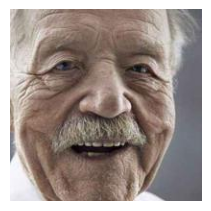

In [11]:
fig,ax = plt.subplots(1,figsize=(2,2),constrained_layout=True)
# sns.set_theme(style='whitegrid',rc=rc,palette='Set2')
img = Image.open(df["image"][0])
plt.axis('off')
plt.imshow(img)

In [12]:
print(f"Total genders present: {df.gender.unique()}")

Total genders present: [0 1]


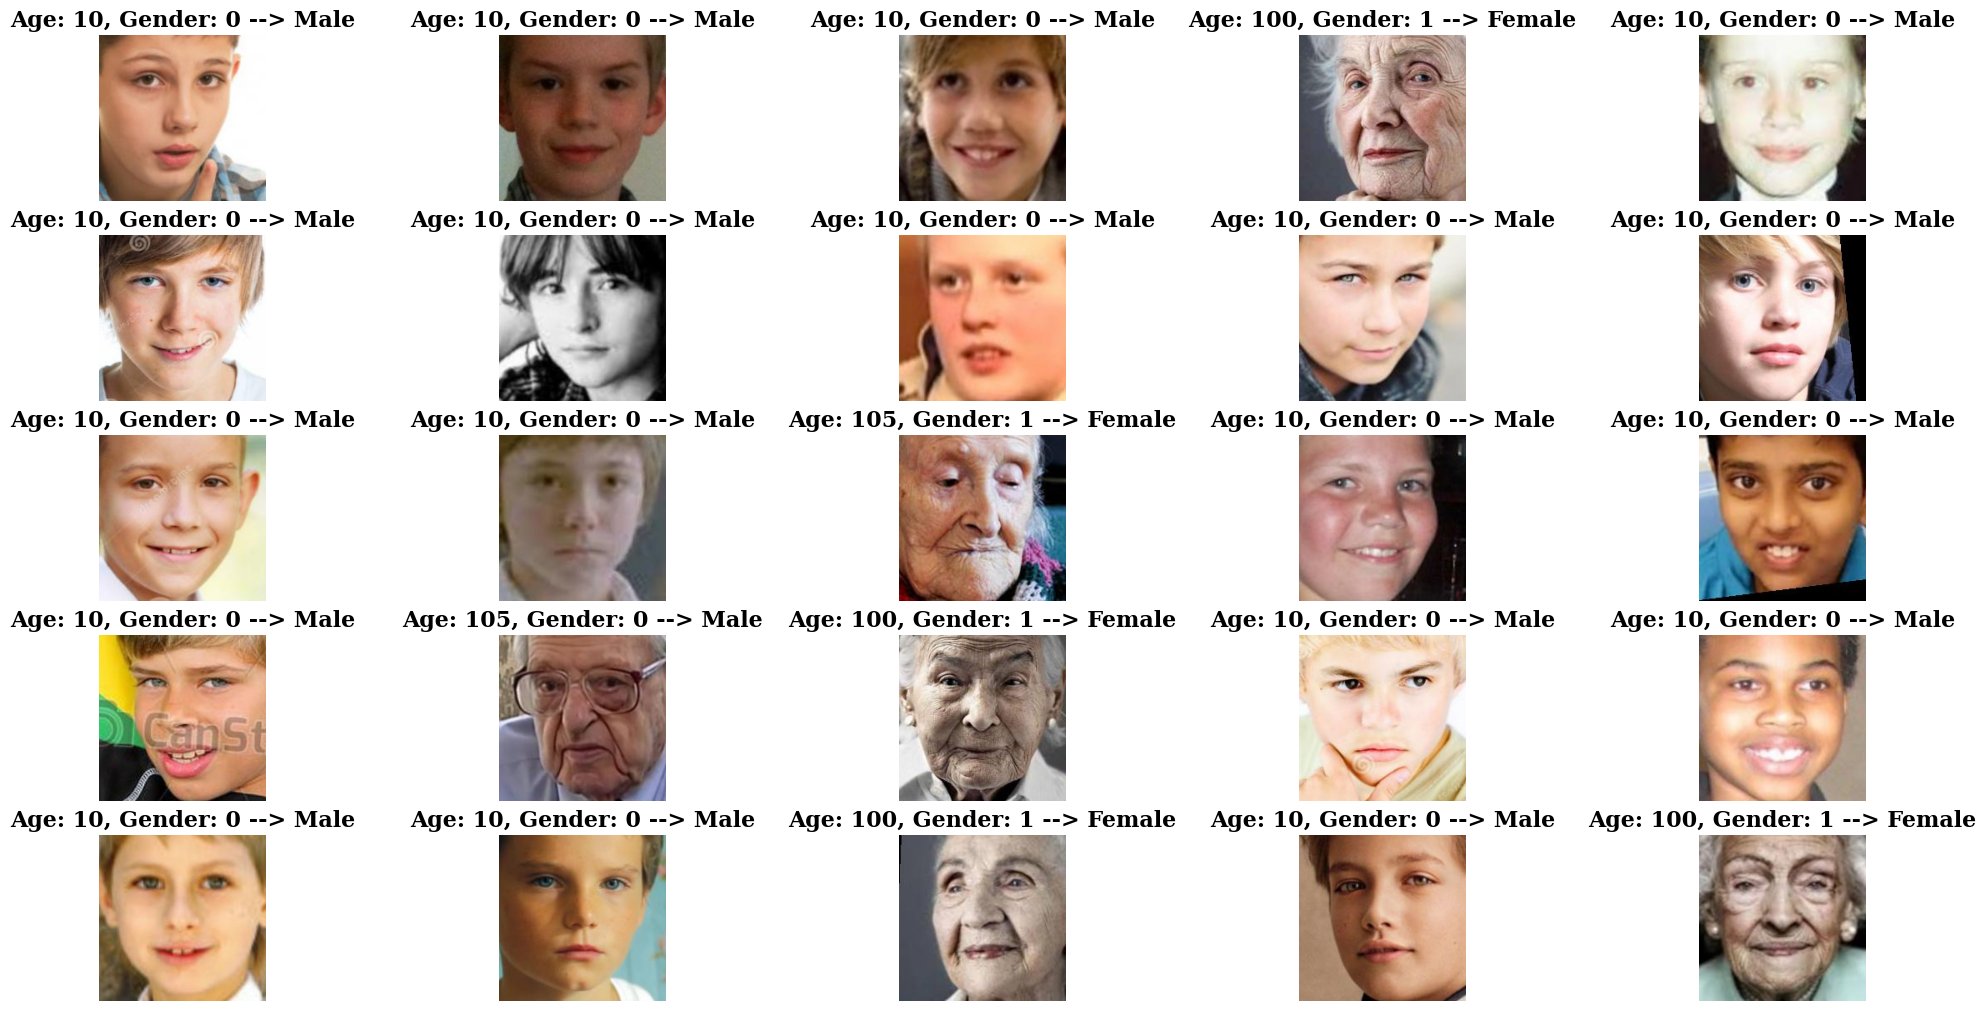

In [16]:
# cond = (df.age > 20) & (df.age<50)
# files = df.loc[cond,:]
files = df
files = files.sample(n=25)
files
fig,ax = plt.subplots(5,5,figsize=(20,10),constrained_layout=True)
sns.set_theme(style='white',palette='Set2')
ax = ax.ravel()
for positional_index,(index, image_file,age, gender) in enumerate(files.itertuples()):
    # Load and display the image on the specified axis
    img = load_img(image_file)
    img = np.array(img)
    # Pass the specific axis to work with
    ax[positional_index].imshow(img)
    ax[positional_index].set_title(f"Age: {age}, Gender: {gender} --> {gender_dict[gender]}",fontdict=font_title)

    ax[positional_index].axis('off')

In [15]:
# files = df.iloc[0:25]
# for index in files.itertuples():
#     print(index)

### **Feature Extraction**

In [20]:
df.isna().sum()

image     0
age       0
gender    0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df,random_state=20,test_size=.2,shuffle=True)

In [40]:
train_data.head()

,image,age,gender
37,data/gender_age_unzipped\10_0_0_20170110220541...,10,0
51,data/gender_age_unzipped\10_0_0_20170110224406...,10,0
35,data/gender_age_unzipped\10_0_0_20170110220530...,10,0
65,data/gender_age_unzipped\10_0_0_20170110225414...,10,0
31,data/gender_age_unzipped\10_0_0_20170110220403...,10,0


In [41]:
# Converting images to numpy_array; extracting features
def extract_features(images):
    features = []
    for image in tqdm.tqdm(images):
        img = load_img(image)
        img = img.resize((150,150))
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    return features

In [42]:
X_train = extract_features(train_data['image'])
X_train = X_train/225.0

100%|██████████| 80/80 [00:00<00:00, 967.79it/s]


In [43]:
y_gender_train = np.array(train_data['gender'])
y_age_train = np.array(train_data['age'])

### **Creating the Callbacks and Deep Learning Network**

In [52]:
# # Define the custom callback
# # This must be modified if to be used
# class MyCustomCallback(tf.keras.callbacks.Callback):
#     def __init__(self):
#         super(MyCustomCallback, self).__init__()

#     def on_epoch_end(self, epoch, logs=None):
#         if logs is not None:
#             val_loss = logs.get('val_loss') 
#             loss = logs.get('loss')
#             val_acc = logs.get('val_accuracy') 
#             acc = logs.get('accuracy')
#             if val_loss < 0.4:
#                 print(f"\nValidation loss is less than 0.4. \nStopping training.\n")
#                 self.model.stop_training = True
#             elif (loss <0.6) and (val_loss <= loss ):
#                 print(f"\nValidation loss is less than loss: {loss} and loss is less than 0.6\nStopping training.\n")
#                 self.model.stop_training = True
#             elif (val_acc >= 0.75 ) or (val_loss <= 0.55  ):
#                 print(f"\nValidation loss is <= 0.55 or val_accuracy >= 0.75\nStopping training.\n")
#                 self.model.stop_training = True

# callback = MyCustomCallback()

In [72]:
import datetime
class TimeCallback(tf.keras.callbacks.Callback):

    def on_epoch_begin(self,epoch, logs=None):
        print('Epoch: {}, begins at {}\n'.format(epoch, datetime.datetime.now().time()))

    def on_epoch_end(self,epoch, logs=None):
        print(' Epoch: {}, ends at {}\n'.format(epoch, datetime.datetime.now().time()))

my_timer = TimeCallback()

In [73]:
# Learning Rate Schedulers
peak_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    mode= 'min',
    min_lr=0.00001
)

# Learning rate scheduler
def scheduler(epoch,lr):
    if epoch < 2:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

my_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [74]:
# Model Check point
os.makedirs("model_checkpoints",exist_ok=True)
model_checker = tf.keras.callbacks.ModelCheckpoint(
    "model_checkpoints/checkpoint.model.keras",
    # monitor=['val_age_mae',"val_gender_accuracy"],
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    mode="min",
    save_freq = 'epoch'
)

In [75]:
tf.keras.backend.clear_session()
input_shape = (150,150,3)
inputs = Input((input_shape))
# convulational layers
conv_1 = Conv2D(32,(3,3), activation='relu', padding='same')(inputs)
max_pol1 = MaxPooling2D(2,2) (conv_1)

conv_2 = Conv2D(64,(3,3), activation='relu', padding='same')(max_pol1)
max_pol2 = MaxPooling2D(2,2) (conv_2)

conv_3 = Conv2D(128,(3,3), activation='relu', padding='same')(max_pol2)
max_pol3 = MaxPooling2D(2,2) (conv_3)

# conv_4 = Conv2D(256,(3,3), activation='relu', padding='same')(max_pol3)
# max_pol4 = MaxPooling2D(2,2) (conv_4)

# conv_5 = Conv2D(512,(3,3), activation='relu', padding='same')(max_pol4)
# max_pol5 = MaxPooling2D(2,2) (conv_5)

# conv_6 = Conv2D(64,(3,3), activation='relu', padding='same')(max_pol5)
# max_pol6 = MaxPooling2D(2,2) (conv_6)

flatten = Flatten()(max_pol3)

dense1 = Dense(64,activation='relu')(flatten)
dense2 = Dense(64,activation='relu')(flatten)

bn_layer1 = tf.keras.layers.BatchNormalization()(dense1)
bn_layer2 = tf.keras.layers.BatchNormalization()(dense2)
dropout1 = Dropout(0.5)(bn_layer1)
dropout2 = Dropout(0.5)(bn_layer2)


output1 = Dense(1,activation="sigmoid",name="gender")(dropout1)
output2 = Dense(1,activation="relu",name="age")(dropout2)


model = Model(inputs=[inputs], outputs=[output1,output2])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 150, 150,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 75, 75,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 75, 75,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 37, 37,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 37, 37,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 18, 18,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 41472)     │          0 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  2,654,272 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │  2,654,272 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender (Dense)      │ (None, 1)         │         65 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age (Dense)         │ (None, 1)         │         65 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,402,434 (20.61 MB)

 Trainable params: 5,402,178 (20.61 MB)

 Non-trainable params: 256 (1.00 KB)

In [76]:
tf.keras.backend.clear_session()
# optimiser
optimise = tf.keras.optimizers.Adam(learning_rate=0.01)

# metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
model.compile(optimizer=optimise,
              loss=['binary_crossentropy','mae'],
              metrics=['accuracy','mae'])

In [77]:
tf.keras.backend.clear_session()

history = model.fit(X_train,(y_gender_train,y_age_train),
                        epochs=20,
                        validation_split=.20,
                        batch_size=20,
                        # steps_per_epoch=5,
                        verbose=1,
                        callbacks=[#callback,
                            model_checker,
                            my_scheduler,
                            peak_callback,
                            my_timer]
                        )

Epoch: 0, begins at 08:51:21.152510

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - age_mae: 31.7032 - gender_accuracy: 0.5135 - loss: 32.4040
Epoch 1: val_loss improved from inf to 144.05551, saving model to model_checkpoints/checkpoint.model.keras
 Epoch: 0, ends at 08:51:32.539546

4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - age_mae: 30.9307 - gender_accuracy: 0.5233 - loss: 31.6318 - val_age_mae: 21.5625 - val_gender_accuracy: 0.1250 - val_loss: 144.0555 - learning_rate: 0.0100
Epoch: 1, begins at 08:51:32.571159

Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - age_mae: 24.5470 - gender_accuracy: 0.6185 - loss: 25.2654
Epoch 2: val_loss improved from 144.05551 to 27.21220, saving model to model_checkpoints/checkpoint.model.keras
 Epoch: 1, ends at 08:51:34.899787

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step - age_mae: 25.0074 - gender_accuracy: 0.6229 - loss: 25.7140 - val_age_mae: 21.5625 - val_gender_accuracy: 0.8750 - val_loss: 27.2122 - learning_rate: 0.0100
Epoch: 2, begins at 

In [79]:
# Preparing the test_data
X_test = extract_features(test_data['image'])
X_test = X_test/225.0

100%|██████████| 20/20 [00:00<00:00, 43.65it/s]


In [80]:
y_gender_test = np.array(test_data['gender'])
y_age_test = np.array(test_data['age'])

In [81]:
# Evaluating the model on the test set
score = model.evaluate(X_test, (y_gender_test,y_age_test), verbose=1)

# # Printing the evaluation results
# print(f"Test Loss: {score[0]}")
# print(f"Test Accuracy: {score[1]}")
# print(f"Test Precision: {score[2]}")
# print(f"Test Recall: {score[3]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - age_mae: 28.0500 - gender_accuracy: 0.8500 - loss: 28.6811


In [89]:
print(f"Model: keys:\n{list(history.history.keys())}")

print(f"Scores list: {score}\n")
print(f"Total model loss: {score[0]}\n")
print(f"age_mae: {score[1]}\n")
print(f"gender_accurarcy: {score[2]}\n")

Model: keys:
['age_mae', 'gender_accuracy', 'loss', 'val_age_mae', 'val_gender_accuracy', 'val_loss', 'learning_rate']
Scores list: [28.6811466217041, 28.049999237060547, 0.8500000238418579]

Total model loss: 28.6811466217041

age_mae: 28.049999237060547

gender_accurarcy: 0.8500000238418579



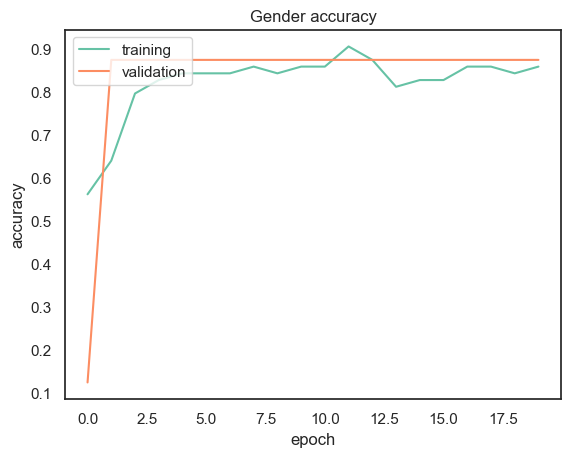

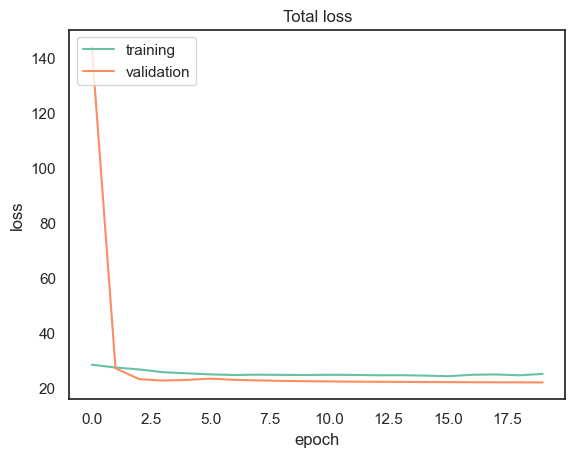

In [90]:
# Models' Performance Charts
plt.plot(history.history['gender_accuracy'])
plt.plot(history.history['val_gender_accuracy'])

plt.title('Gender accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Total loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

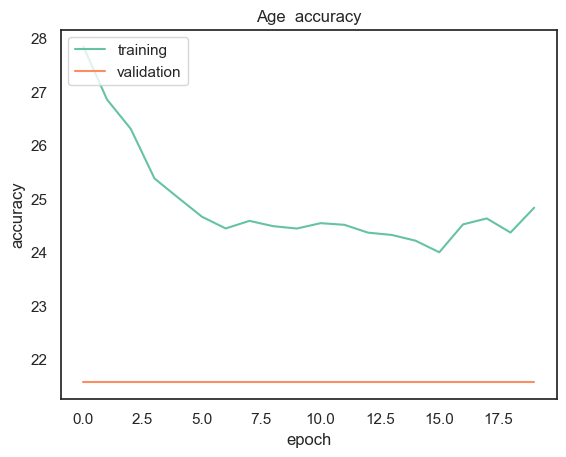

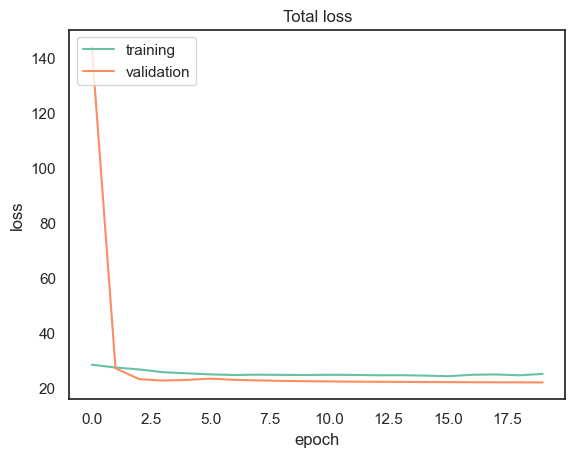

In [91]:
# Models' Performance Charts
# Main output
plt.plot(history.history['age_mae'])
plt.plot(history.history['val_age_mae'])

plt.title('Age  accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Total loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='upper left')
plt.show()

### **Prediction with Test Data**

In [93]:
image_paths_test = []
age_labels_test = []
gender_labels_test = []
# reducing number of images due to memory overload
all_files_test = os.listdir(full_unzipped_path)[100:200]

for filename in tqdm.tqdm(all_files_test):
    image_path = os.path.join(full_unzipped_path,filename)
    temp = filename.split("_")
    age = int(temp[0])
    gender = int(temp[1])
    image_paths_test.append(image_path)
    age_labels_test.append(age)
    gender_labels_test.append(gender)

100%|██████████| 100/100 [00:00<?, ?it/s]


In [94]:
df_test = pd.DataFrame()
df_test['image'],df_test['age'], df_test['gender'] = image_paths_test,age_labels_test,gender_labels_test
df_test.head()

,image,age,gender
0,data/gender_age_unzipped\10_0_4_20161221192738...,10,0
1,data/gender_age_unzipped\10_0_4_20170103200335...,10,0
2,data/gender_age_unzipped\10_0_4_20170103200409...,10,0
3,data/gender_age_unzipped\10_0_4_20170103200443...,10,0
4,data/gender_age_unzipped\10_0_4_20170103200501...,10,0


In [95]:
df_tester = extract_features(df_test['image'])
df_tester = df_tester/225.0

100%|██████████| 100/100 [00:01<00:00, 67.46it/s]


In [96]:
df_gender_test = np.array(df_test['gender'])
df_age_test = np.array(df_test['age'])

Original Gender:Female 
Original Age:, 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gender: Male Predicted Age: 1


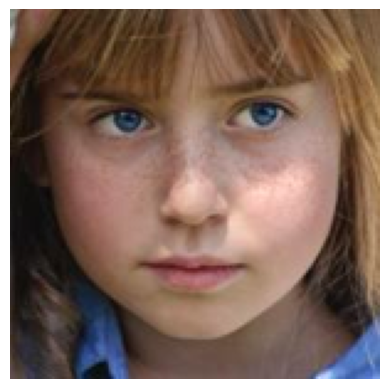

In [111]:
image_index = 40
print(f"Original Gender:{gender_dict[df_gender_test[image_index]]} \nOriginal Age:, {df_age_test[image_index]}")
# predict from model
pred = model.predict(df_tester[image_index].reshape(1, 150, 150, 3))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(df_tester[image_index].reshape(150, 150,3))